In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-eda/zomato.csv


In [2]:
df=pd.read_csv("/kaggle/input/zomato-eda/zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.drop_duplicates()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [4]:
df.drop(columns=['address','url','dish_liked','reviews_list','phone','menu_item'],inplace=True)

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.rename(columns={'address':'Restro_full_address','name':'Restro_name','rate':'ratings','rest_type':'resto_type','reviews_list':'reviews','location':'city','approx_cost(for two people)':'approx_cost_for_two_people'},inplace = True)

In [7]:
df.head()

,Restro_name,online_order,book_table,ratings,votes,city,resto_type,cuisines,approx_cost_for_two_people,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [8]:
df['ratings'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [9]:
df['ratings'].replace(['NEW','-'],0, inplace = True)
df['ratings'].replace(r'[\s*\/5]','',regex=True, inplace = True)

In [10]:
df['ratings'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 0, '2.9', '3.', nan,
       '2.6', '3.4', '4.', '2.', '2.7', '4.7', '2.4', '2.2', '2.3', '4.8',
       '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [11]:
df['ratings']=df['ratings'].astype('float')

In [12]:
df['ratings'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, nan, 2.6, 3.4, 2. , 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 1.8])

In [13]:
df.dropna(inplace=True)

In [14]:
df['ratings'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 2.6, 3.4, 2. , 2.7, 4.7, 2.4, 2.2, 2.3, 4.8,
       4.9, 2.1, 1.8])

In [15]:
df.head()

,Restro_name,online_order,book_table,ratings,votes,city,resto_type,cuisines,approx_cost_for_two_people,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [16]:
df['online_order'].head()


0    Yes
1    Yes
2    Yes
3     No
4     No
Name: online_order, dtype: object

In [17]:
df['cuisines']=df['cuisines'].map(lambda x:x.split(','))
df['cuisines']

0                      [North Indian,  Mughlai,  Chinese]
1                         [Chinese,  North Indian,  Thai]
2                              [Cafe,  Mexican,  Italian]
3                           [South Indian,  North Indian]
4                             [North Indian,  Rajasthani]
                               ...                       
51709                        [North Indian,  Continental]
51711    [Andhra,  South Indian,  Chinese,  North Indian]
51712                                       [Continental]
51715                                       [Finger Food]
51716          [Finger Food,  North Indian,  Continental]
Name: cuisines, Length: 43447, dtype: object

In [18]:
df=df.explode('cuisines')

In [19]:
df['resto_type']=df['resto_type'].map(lambda x:x.split(','))
df['resto_type']

0              [Casual Dining]
0              [Casual Dining]
0              [Casual Dining]
1              [Casual Dining]
1              [Casual Dining]
                 ...          
51712                    [Bar]
51715                    [Bar]
51716    [Bar,  Casual Dining]
51716    [Bar,  Casual Dining]
51716    [Bar,  Casual Dining]
Name: resto_type, Length: 110647, dtype: object

In [20]:
df=df.explode('resto_type')

In [21]:
df

,Restro_name,online_order,book_table,ratings,votes,city,resto_type,cuisines,approx_cost_for_two_people,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,North Indian,800,Buffet,Banashankari
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,Mughlai,800,Buffet,Banashankari
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,Chinese,800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,Chinese,800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,North Indian,800,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51716,The Nest - The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield",Casual Dining,Finger Food,"1,500",Pubs and bars,Whitefield
51716,The Nest - The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield",Bar,North Indian,"1,500",Pubs and bars,Whitefield
51716,The Nest - The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield",Casual Dining,North Indian,"1,500",Pubs and bars,Whitefield
51716,The Nest - The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield",Bar,Continental,"1,500",Pubs and bars,Whitefield


In [22]:
df['approx_cost_for_two_people']=df['approx_cost_for_two_people'].str.replace(',','')
df['approx_cost_for_two_people']=df['approx_cost_for_two_people'].astype(float)
df['approx_cost_for_two_people']=df['approx_cost_for_two_people'].apply(lambda x: x/2)
df.rename(columns = {'approx_cost_for_two_people':'Cost Per Head'}, inplace = True)

In [23]:
df

,Restro_name,online_order,book_table,ratings,votes,city,resto_type,cuisines,Cost Per Head,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,North Indian,400.0,Buffet,Banashankari
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,Mughlai,400.0,Buffet,Banashankari
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,Chinese,400.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,Chinese,400.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,North Indian,400.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51716,The Nest - The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield",Casual Dining,Finger Food,750.0,Pubs and bars,Whitefield
51716,The Nest - The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield",Bar,North Indian,750.0,Pubs and bars,Whitefield
51716,The Nest - The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield",Casual Dining,North Indian,750.0,Pubs and bars,Whitefield
51716,The Nest - The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield",Bar,Continental,750.0,Pubs and bars,Whitefield


In [24]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Text(0.5, 1.0, 'Restaurant delivering online or not')

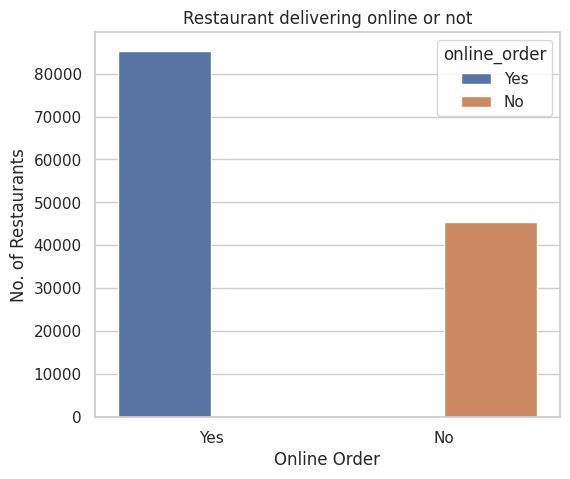

In [25]:
sns.set_theme(style="whitegrid")
plt.figure(figsize= (6,5))
s=sns.countplot(x='online_order',hue='online_order',data=df,palette='deep')
s.set_xlabel("Online Order")
s.set_ylabel("No. of Restaurants")
s.set_title("Restaurant delivering online or not")

In [26]:
import plotly.express as px
import pandas as pd



fig = px.histogram(df, x='online_order', color='online_order', title='Restaurants delivering online',
                   labels={'online_order': 'Online order', 'count': 'No of restaurants'},
                   category_orders={'online_order': ['Yes', 'No']},width=800,height=700)
fig.update_layout(xaxis_title="Online order", yaxis_title="No of restaurants", barmode='group')
fig.show()


In [27]:
df1=df[df['ratings']>4]
df1

,Restro_name,online_order,book_table,ratings,votes,city,resto_type,cuisines,Cost Per Head,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,North Indian,400.0,Buffet,Banashankari
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,Mughlai,400.0,Buffet,Banashankari
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,Chinese,400.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,Chinese,400.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,North Indian,400.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51701,The Beer Cafe,Yes,Yes,4.1,673,Whitefield,Pub,Finger Food,700.0,Pubs and bars,Whitefield
51701,The Beer Cafe,Yes,Yes,4.1,673,Whitefield,Pub,North Indian,700.0,Pubs and bars,Whitefield
51701,The Beer Cafe,Yes,Yes,4.1,673,Whitefield,Pub,Chinese,700.0,Pubs and bars,Whitefield
51701,The Beer Cafe,Yes,Yes,4.1,673,Whitefield,Pub,Italian,700.0,Pubs and bars,Whitefield


In [28]:
df2=df1.head()
df2

,Restro_name,online_order,book_table,ratings,votes,city,resto_type,cuisines,Cost Per Head,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,North Indian,400.0,Buffet,Banashankari
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,Mughlai,400.0,Buffet,Banashankari
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,Chinese,400.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,Chinese,400.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,North Indian,400.0,Buffet,Banashankari


Text(0.5, 1.0, 'Restaurant allowing tbale booking or not')

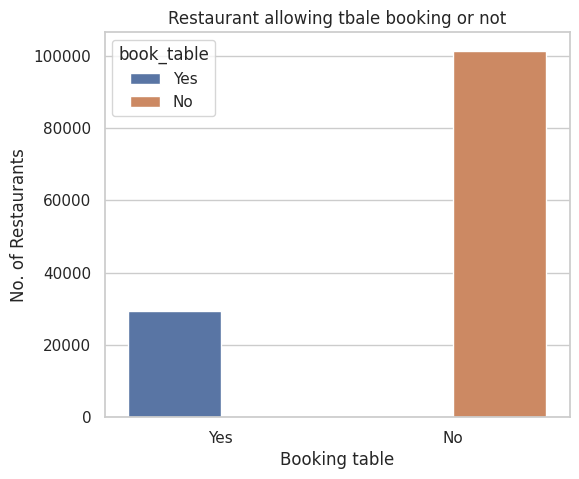

In [29]:
sns.set_theme(style="whitegrid")
plt.figure(figsize= (6,5))
s=sns.countplot(x='book_table',hue='book_table',data=df,palette='deep')
s.set_xlabel("Booking table")
s.set_ylabel("No. of Restaurants")
s.set_title("Restaurant allowing tbale booking or not")

Text(0.5, 1.0, 'Table booking Rate vs Ratings')

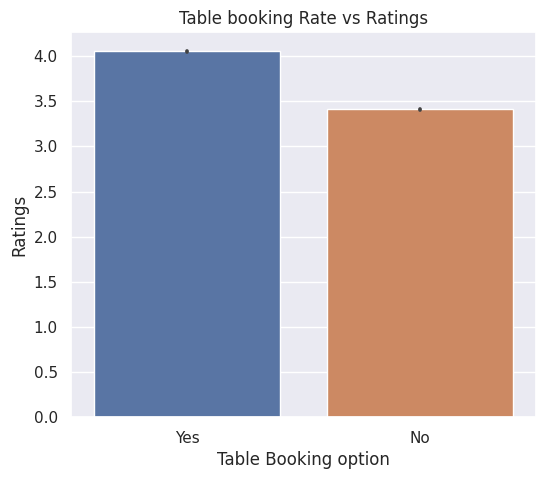

In [30]:
sns.set_theme(style="darkgrid")
plt.figure(figsize= (6,5))
s=sns.barplot(x='book_table',y='ratings',data=df)
s.set_xlabel("Table Booking option")
s.set_ylabel("Ratings")
s.set_title("Table booking Rate vs Ratings")

In [31]:
df

,Restro_name,online_order,book_table,ratings,votes,city,resto_type,cuisines,Cost Per Head,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,North Indian,400.0,Buffet,Banashankari
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,Mughlai,400.0,Buffet,Banashankari
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,Chinese,400.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,Chinese,400.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,North Indian,400.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51716,The Nest - The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield",Casual Dining,Finger Food,750.0,Pubs and bars,Whitefield
51716,The Nest - The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield",Bar,North Indian,750.0,Pubs and bars,Whitefield
51716,The Nest - The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield",Casual Dining,North Indian,750.0,Pubs and bars,Whitefield
51716,The Nest - The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield",Bar,Continental,750.0,Pubs and bars,Whitefield


Text(0.5, 1.0, 'Best Location')

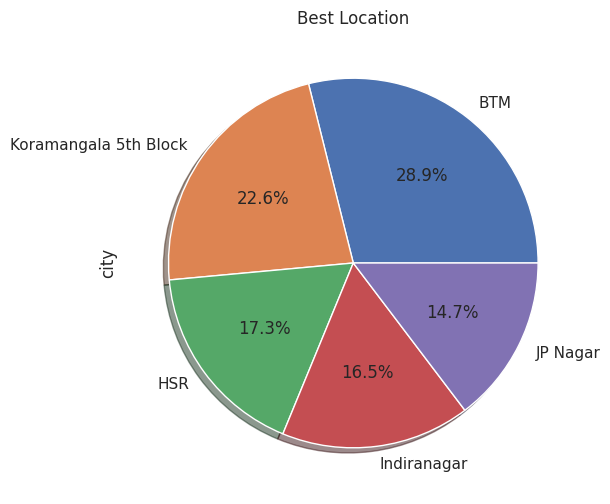

In [32]:
city_freq = df.groupby('city')['city'].count().sort_values(ascending = False).head(5)
city_freq.plot(kind='pie',figsize=(6,6), shadow=True, autopct='%.1f%%')
plt.title('Best Location')

In [33]:
relation_loc = df.groupby('city').agg({'ratings':'mean'}).sort_values(by='ratings', ascending = False).head(5)

array([<Axes: ylabel='ratings'>], dtype=object)

<Figure size 2000x2000 with 0 Axes>

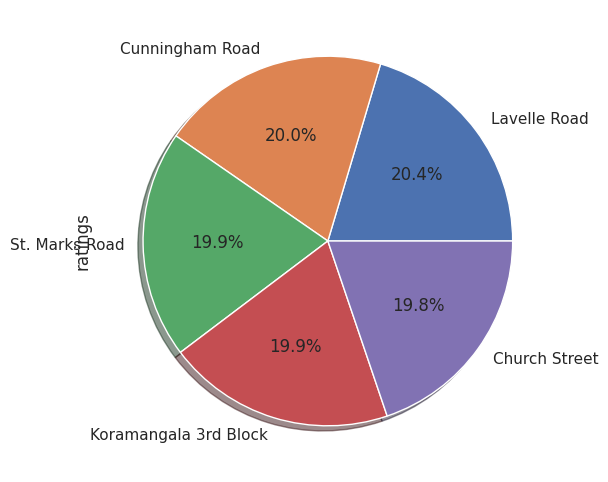

In [34]:
sns.set_theme(style="whitegrid")
plt.figure(figsize= (20,20))
relation_loc.plot(subplots=True,kind='pie',figsize=(6,6), legend = False,shadow=True, autopct='%.1f%%')

In [35]:
df

,Restro_name,online_order,book_table,ratings,votes,city,resto_type,cuisines,Cost Per Head,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,North Indian,400.0,Buffet,Banashankari
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,Mughlai,400.0,Buffet,Banashankari
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,Chinese,400.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,Chinese,400.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,North Indian,400.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51716,The Nest - The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield",Casual Dining,Finger Food,750.0,Pubs and bars,Whitefield
51716,The Nest - The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield",Bar,North Indian,750.0,Pubs and bars,Whitefield
51716,The Nest - The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield",Casual Dining,North Indian,750.0,Pubs and bars,Whitefield
51716,The Nest - The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield",Bar,Continental,750.0,Pubs and bars,Whitefield


In [36]:
rest=df["resto_type"].value_counts().sort_values(ascending=False)


In [37]:
rest

resto_type
Casual Dining      34816
Quick Bites        34088
Cafe               12471
Dessert Parlor      4825
 Bar                4279
Delivery            4165
Takeaway            3577
 Casual Dining      3536
 Delivery           3379
Bar                 2838
 Cafe               2631
Pub                 2621
Bakery              2437
 Quick Bites        2374
Beverage Shop       2271
Lounge              1341
Food Court          1305
 Dessert Parlor     1225
Sweet Shop          1101
Fine Dining         1032
Microbrewery         810
 Bakery              737
 Pub                 554
 Microbrewery        481
 Beverage Shop       401
Mess                 355
Kiosk                295
 Sweet Shop          258
 Lounge              141
Food Truck           135
Club                 104
 Food Court           54
Dhaba                 42
 Irani Cafee          30
Confectionery         15
 Kiosk                 8
 Mess                  8
 Meat Shop             8
Bhojanalya             3
Name: count, d

Text(0.5, 1.0, 'Restaurents Types')

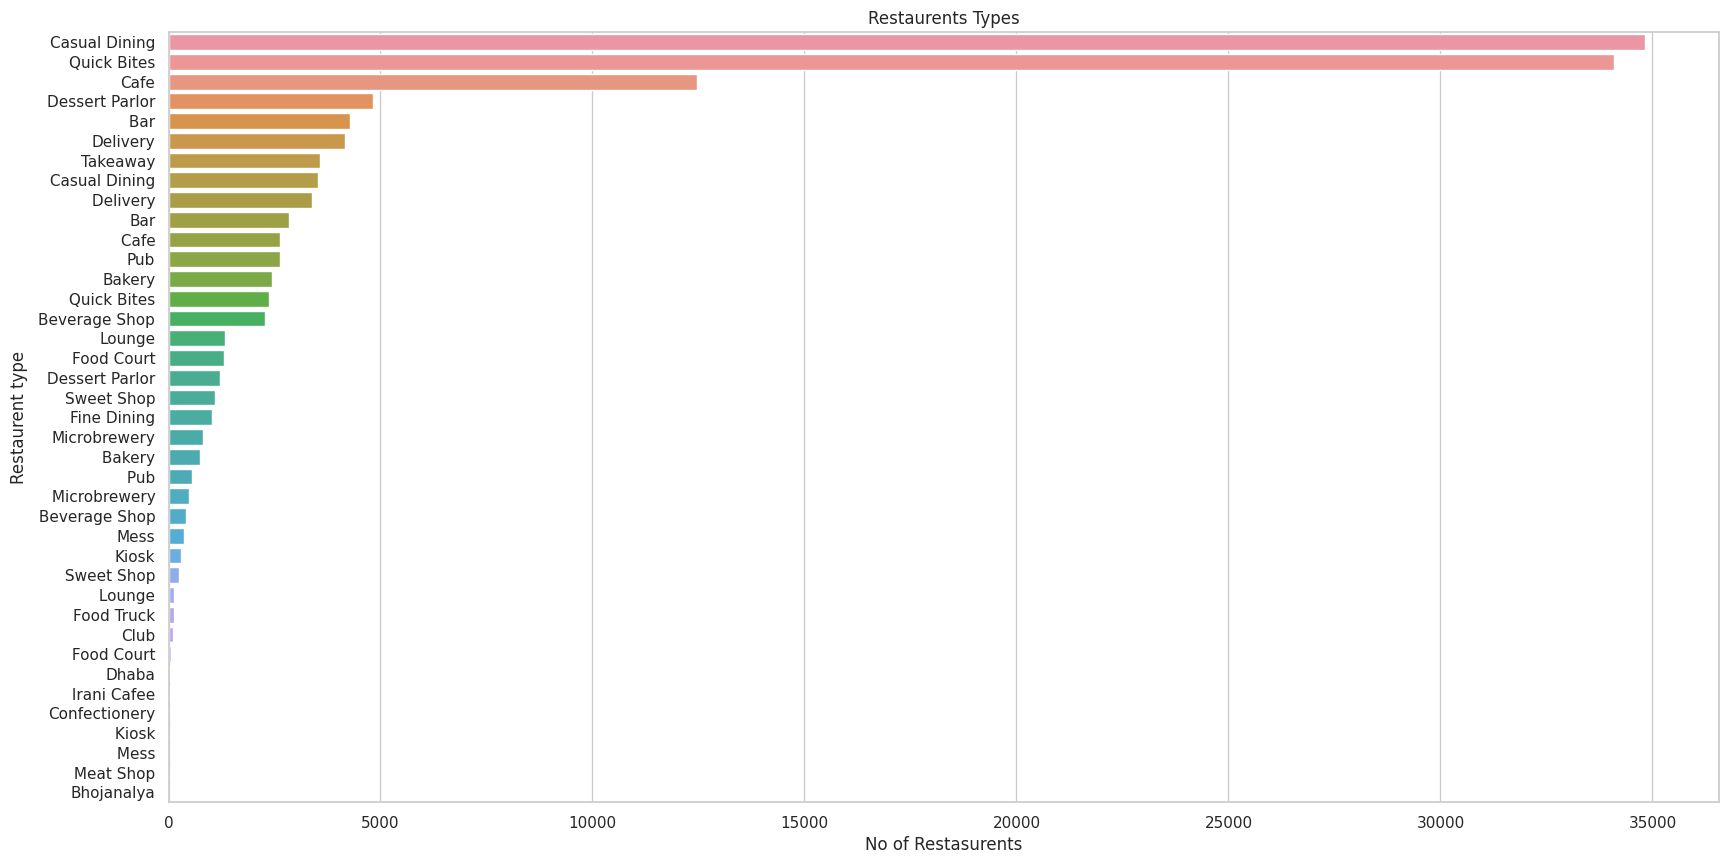

In [38]:
sns.set_theme(style="whitegrid")
plt.figure(figsize= (20,10))
s1=sns.barplot(x=rest.values,y=rest.index)
s1.set_xlabel("No of Restasurents")
s1.set_ylabel("Restaurent type")
s1.set_title("Restaurents Types")

In [39]:
rest_rating=df.groupby('resto_type').agg({'ratings':'mean'})
rest_rating

,ratings
resto_type,
Bakery,3.884803
Bar,3.896378
Beverage Shop,3.756110
Cafe,3.985937
Casual Dining,3.869768
Delivery,3.057739
Dessert Parlor,3.748245
Food Court,2.922222
Irani Cafee,4.373333


<Axes: ylabel='Density'>

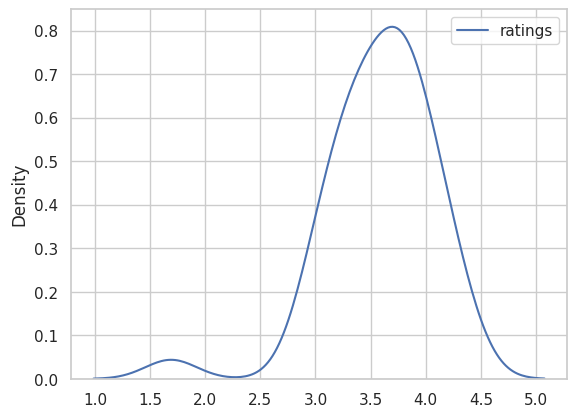

In [40]:
sns.kdeplot(data=rest_rating)

In [41]:
services=df["resto_type"].value_counts().sort_values(ascending=False).head(10)
services

resto_type
Casual Dining     34816
Quick Bites       34088
Cafe              12471
Dessert Parlor     4825
 Bar               4279
Delivery           4165
Takeaway           3577
 Casual Dining     3536
 Delivery          3379
Bar                2838
Name: count, dtype: int64

Text(0.5, 1.0, 'Type of Services')

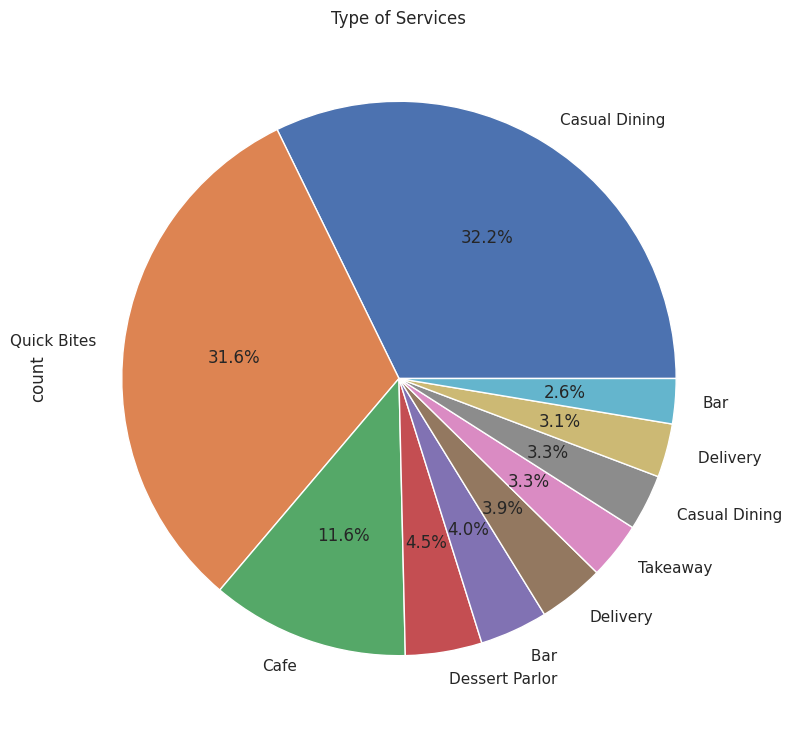

In [42]:
services.plot(kind='pie',figsize=(9,9), autopct='%.1f%%')
plt.title('Type of Services')

In [43]:
ratings1=df.groupby('resto_type').agg({'ratings':'mean'}).sort_values(by='ratings',ascending=False)
ratings1

,ratings
resto_type,
Irani Cafee,4.373333
Lounge,4.257447
Pub,4.235199
Fine Dining,4.157171
Microbrewery,4.081728
Microbrewery,4.071102
Club,4.036538
Cafe,3.985937
Bar,3.896378


Text(0.5, 1.0, 'Relation between Restaurant type & Ratings')

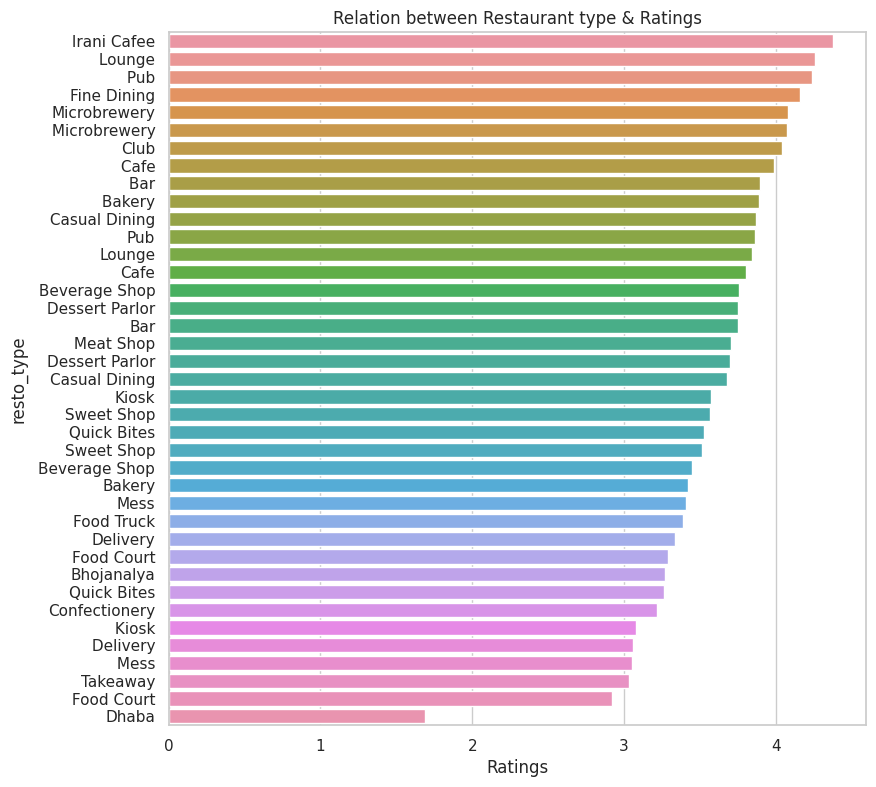

In [44]:
sns.set_theme(style="whitegrid")
plt.figure(figsize= (9,9))
s = sns.barplot(data= ratings1, x='ratings',y = ratings1.index)
s.set_xlabel('Ratings')
s.set_title('Relation between Restaurant type & Ratings')

In [45]:
approx_cost = df.groupby('Restro_name').agg({'Cost Per Head':'mean'}).sort_values(by= 'Cost Per Head',ascending = False).head(10)

In [46]:
approx_cost

,Cost Per Head
Restro_name,
Le Cirque Signature - The Leela Palace,3000.0
Royal Afghan - ITC Windsor,2500.0
Malties - Radisson Blu,2250.0
La Brasserie - Le Meridien,2050.0
Grill 99 - The Ritz-Carlton,2000.0
Dum Pukht Jolly Nabobs - ITC Windsor,2000.0
Edo Restaurant & Bar - ITC Gardenia,2000.0
Riwaz - The Ritz-Carlton,2000.0
Dakshin - ITC Windsor,2000.0


Text(0, 0.5, 'rest_name')

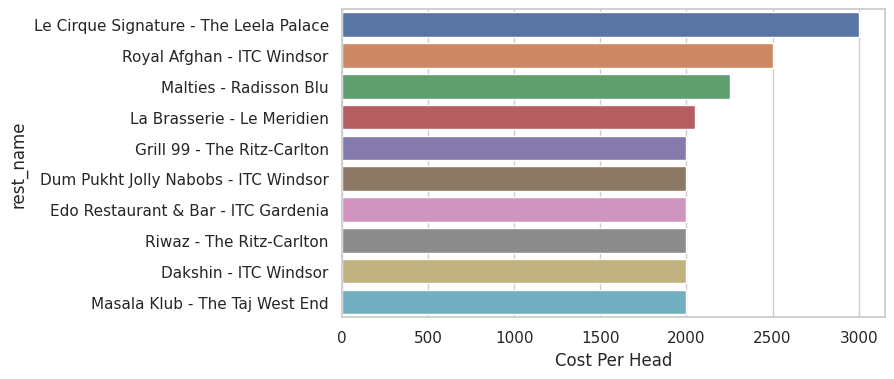

In [47]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(7,4))
s=sns.barplot(data=approx_cost,y=approx_cost.index,x='Cost Per Head')

s.set_ylabel('rest_name')

In [48]:
rest_city = df.groupby('city').agg({'Restro_name':'count'}).sort_values(by='Restro_name',ascending = False).head(10)
rest_city

,Restro_name
city,
BTM,11061
Koramangala 5th Block,8640
HSR,6628
Indiranagar,6333
JP Nagar,5619
Whitefield,5058
Jayanagar,4916
Marathahalli,4318
Bannerghatta Road,3548


Text(0.5, 1.0, 'Number of restaurents in a Location')

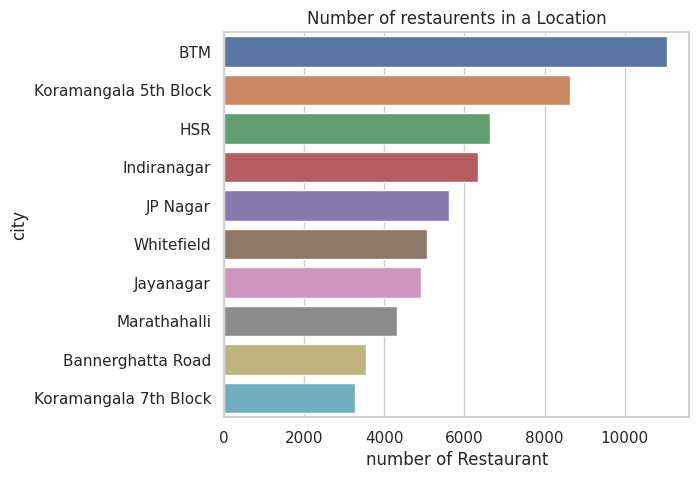

In [49]:
sns.set_theme(style="whitegrid")
plt.figure(figsize= (6,5))
s = sns.barplot(data=rest_city,x='Restro_name', y=rest_city.index)
s.set_xlabel('number of Restaurant')
s.set_ylabel('city')
s.set_title('Number of restaurents in a Location')

In [50]:
df

,Restro_name,online_order,book_table,ratings,votes,city,resto_type,cuisines,Cost Per Head,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,North Indian,400.0,Buffet,Banashankari
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,Mughlai,400.0,Buffet,Banashankari
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,Chinese,400.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,Chinese,400.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,North Indian,400.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51716,The Nest - The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield",Casual Dining,Finger Food,750.0,Pubs and bars,Whitefield
51716,The Nest - The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield",Bar,North Indian,750.0,Pubs and bars,Whitefield
51716,The Nest - The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield",Casual Dining,North Indian,750.0,Pubs and bars,Whitefield
51716,The Nest - The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield",Bar,Continental,750.0,Pubs and bars,Whitefield
